# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [34]:
# Install the required libraries
!pip install prophet

In [35]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline #some plots don't with this

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [36]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

C:\Users\dclar\AppData\Local\Temp\ipykernel_28716\1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [37]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: xlabel='Date'>

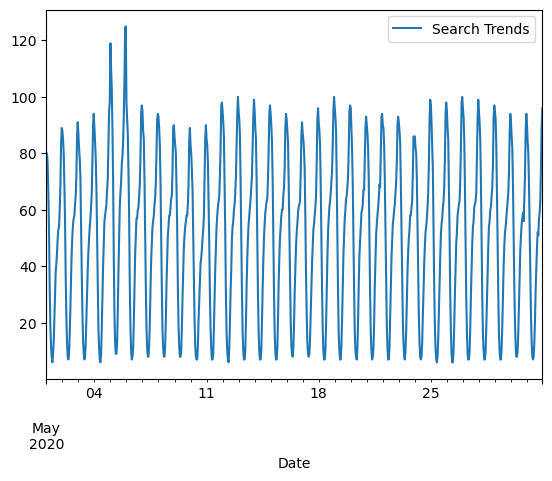

In [38]:
# Slice the DataFrame to just the month of May 2020
df_mercado_may_2020=df_mercado_trends.loc["2020-05-01": "2020-05-31"]

# Plot to visualize the data for May 2020
df_mercado_may_2020.plot()


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [39]:
# Calculate the sum of the total search traffic for May 2020


# View the traffic_may_2020 value
df_mercado_may_2020.sum()

Search Trends    38181
dtype: int64

In [40]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
df_mercado_month_trend=df_mercado_trends.copy()
df_mercado_month_trend=df_mercado_month_trend.groupby(by=[df_mercado_month_trend.index.year, df_mercado_trends.index.month]).sum()



# View the median_monthly_traffic value
df_mercado_month_trend.median()

Search Trends    35172.5
dtype: float64

In [42]:
# Compare the search traffic for the month of May 2020 to the overall monthly median value
print(f"During the period of June 2016 to September 2020, the median monthly views of the website were\n{df_mercado_month_trend["Search Trends"].median():,.1f}.\n\nDuring the May 2020 period the monthly views were {df_mercado_may_2020["Search Trends"].sum():,.1f}.\n\nIn May 2020, the views were {df_mercado_may_2020["Search Trends"].sum()/df_mercado_month_trend["Search Trends"].median():.2f} times more suggesting that the financial results did increase\ntraffic.")

During the period of June 2016 to September 2020, the median monthly views of the website were
35,172.5.

During the May 2020 period the monthly views were 38,181.0.

In May 2020, the views were 1.09 times more suggesting that the financial results did increase
traffic.


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**  Yes, the website traffic in May 2020 was higher than the monthly median over several years.  

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

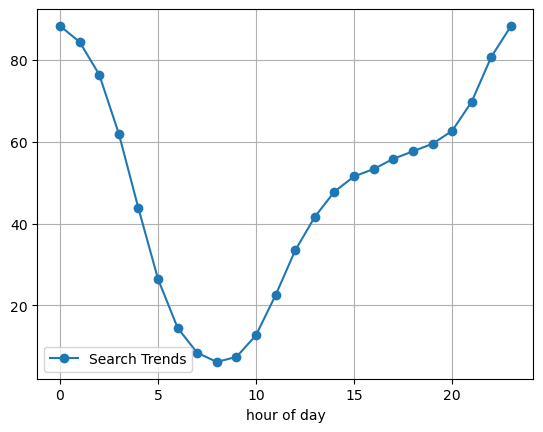

In [43]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`. This should say by hour of the day.

df_mercado_trends_hour=df_mercado_trends.groupby(by=df_mercado_trends["Search Trends"].index.hour).mean()

df_mercado_trends_hour.plot(xlabel="hour of day", marker="o").grid()


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

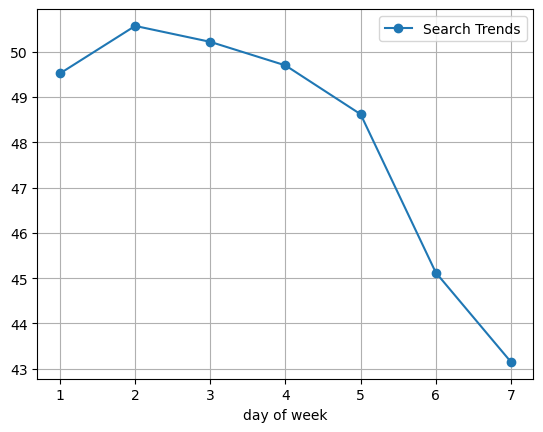

In [44]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.

df_mercado_trends_day=df_mercado_trends.groupby(by=df_mercado_trends["Search Trends"].index.isocalendar().day).mean()

df_mercado_trends_day.plot(xlabel="day of week", marker="o").grid()



#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

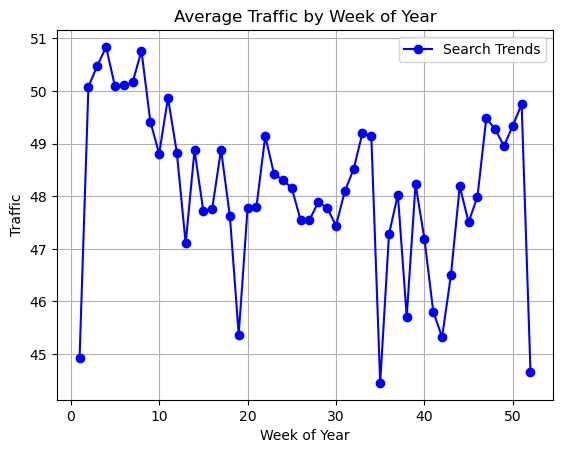

In [47]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.

df_mercado_trends_week=df_mercado_trends.groupby(by=df_mercado_trends.index.isocalendar().week).mean()

#using Dataframe.plot()
#df_mercado_trends_week.plot(xlabel="week of year") #using Dataframe.plot()

#Using MatplotLib
fig1, ax1=plt.subplots()
ax1.plot(df_mercado_trends_week.index,
         df_mercado_trends_week["Search Trends"],
         label="Search Trends",
         color="blue",
         marker="o")
ax1.set_xlabel("Week of Year")
ax1.set_ylabel("Traffic")
ax1.set_title("Average Traffic by Week of Year")
plt.legend(loc="best")
ax1.grid()

#add data labels
# #not as nice as hoped.  Maybe more useful some other time

#for i, value in enumerate(df_mercado_trends_week["Search Trends"]):
 #   ax1.text(
  #      df_mercado_trends_week.index[i],
   #     value,
    #    f"{value:.1f}",
     #   fontsize=9,
      #  ha="center",
       # va="bottom",
        #color="black"
    #)
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**  

During the day, traffic gradually increases from hour 8 (8 AM) until hour 0 (midnight) when it peaks.  From hour 0 (midnight) until hour 8 (8 AM) traffic steadily decreases.  This probably reflects the sleeping habits of the site users.

During the week traffic remains steady at at a higher level through day 4 (Thursday) with a peak on day 2 (Tuesday).  Starting on day 5 (Friday) traffic begins to decline and bottoms out on day 7 (Sunday).  

During the year, the highest traffic can be seen in the 5 weeks prior to the last week and the 7 weeks following the first week of the year.  From week 9 to week 34 the traffic is lower but steady.  From week 34 until those last 5 weeks there is decreased traffic.  The peaks at the end and beginning of year probably reflects Christmas shopping and purchasing of items not received.  The last week and first week of the year represents the time right before Christmas through New Years where more celebrating is happening and less shopping is happening. The lull around week 34 reflects summer time where people are enjoying the nice weather and shopping less. 

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [48]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

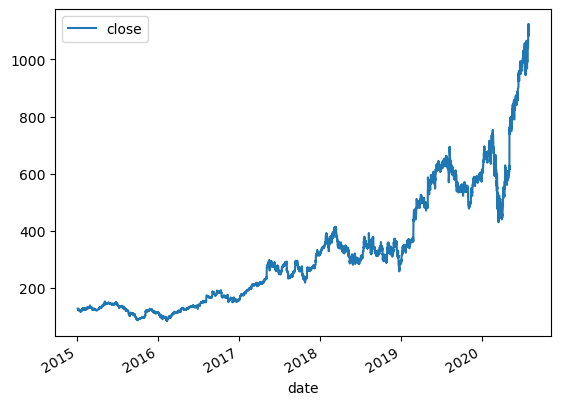

In [49]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot()

In [50]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data

df_merge=pd.merge(df_mercado_stock,
                  df_mercado_trends,
                  how="inner",
                  left_index=True,
                  right_index=True).dropna()


# View the first and last five rows of the DataFrame
display(df_merge.head())
display(df_merge.tail())
df_merge.info()


,close,Search Trends
2016-06-01 09:00:00,135.16,6
2016-06-01 10:00:00,136.63,12
2016-06-01 11:00:00,136.56,22
2016-06-01 12:00:00,136.42,33
2016-06-01 13:00:00,136.10,40


,close,Search Trends
2020-07-31 11:00:00,1105.780,20
2020-07-31 12:00:00,1087.925,32
2020-07-31 13:00:00,1095.800,41
2020-07-31 14:00:00,1110.650,47
2020-07-31 15:00:00,1122.510,53


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7067 entries, 2016-06-01 09:00:00 to 2020-07-31 15:00:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close          7067 non-null   float64
 1   Search Trends  7067 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 165.6 KB


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [51]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)

df_merge_1h_2020=df_merge.loc["2020-01-01":"2020-06-30"]


# View the first and last five rows of first_half_2020 DataFrame
display(df_merge_1h_2020.head())
display(df_merge_1h_2020.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9
2020-01-02 10:00:00,601.290,14
2020-01-02 11:00:00,615.410,25
2020-01-02 12:00:00,611.400,37
2020-01-02 13:00:00,611.830,50


,close,Search Trends
2020-06-30 11:00:00,976.17,17
2020-06-30 12:00:00,977.50,27
2020-06-30 13:00:00,973.23,37
2020-06-30 14:00:00,976.50,45
2020-06-30 15:00:00,984.93,51


array([<Axes: >, <Axes: >], dtype=object)

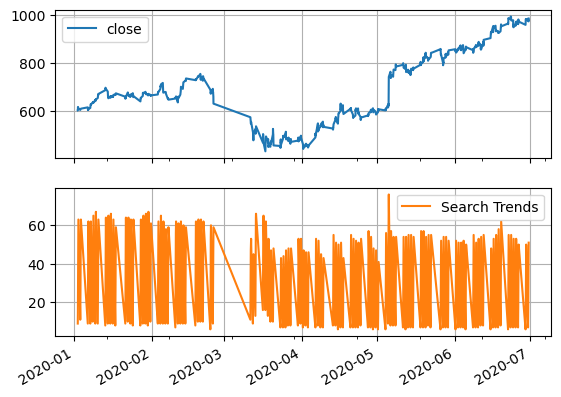

In [52]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`

df_merge_1h_2020.plot(subplots=True, grid=True)


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**
Generally the trends are consistent with the stated narrative.  The stock price and traffic was steady until late February/early March when everything shutdown.  It took a couple of weeks for the traffic to come back as people adjusted and the stock started to recover.  The stock continues to rise through the end of June passing is beginning year baseline in May.  However, the traffic is steady from mid March through end of June.  The traffic never recovers to the beginning of year baseline but as shown previously there is generally lower traffic during these months in all years from 2016 to 2020.  If new customers were being added, the traffic should have gone up.  Neither the stock price nor the traffic directly points to revenue but the stock price could certainly be increasing due to revenue trends reported by the company.  If this is the case, the level search data would seem to indicate the existing user base is buying more online as they shift away from brick and mortar stores due to health concerns and shutdowns thus increasing revenue rather than new customers creating added revenue.  

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [53]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

df_merge_shift=df_merge.copy()
df_merge_shift["lagged_search_trends"]=df_merge_shift["Search Trends"].shift(1)

display(df_merge_shift.head())
display(df_merge_shift.tail())
df_merge_shift.info()

,close,Search Trends,lagged_search_trends
2016-06-01 09:00:00,135.16,6,NaN
2016-06-01 10:00:00,136.63,12,6.0
2016-06-01 11:00:00,136.56,22,12.0
2016-06-01 12:00:00,136.42,33,22.0
2016-06-01 13:00:00,136.10,40,33.0


,close,Search Trends,lagged_search_trends
2020-07-31 11:00:00,1105.780,20,11.0
2020-07-31 12:00:00,1087.925,32,20.0
2020-07-31 13:00:00,1095.800,41,32.0
2020-07-31 14:00:00,1110.650,47,41.0
2020-07-31 15:00:00,1122.510,53,47.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7067 entries, 2016-06-01 09:00:00 to 2020-07-31 15:00:00
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   close                 7067 non-null   float64
 1   Search Trends         7067 non-null   int64  
 2   lagged_search_trends  7066 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 478.9 KB


In [54]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window

df_merge_shift["stock_volatility"]=df_merge_shift["close"].pct_change().rolling(window=4).std()

display(df_merge_shift.head())
display(df_merge_shift.tail())
df_merge_shift.info()

,close,Search Trends,lagged_search_trends,stock_volatility
2016-06-01 09:00:00,135.16,6,NaN,NaN
2016-06-01 10:00:00,136.63,12,6.0,NaN
2016-06-01 11:00:00,136.56,22,12.0,NaN
2016-06-01 12:00:00,136.42,33,22.0,NaN
2016-06-01 13:00:00,136.10,40,33.0,0.006134


,close,Search Trends,lagged_search_trends,stock_volatility
2020-07-31 11:00:00,1105.780,20,11.0,0.012837
2020-07-31 12:00:00,1087.925,32,20.0,0.013549
2020-07-31 13:00:00,1095.800,41,32.0,0.013295
2020-07-31 14:00:00,1110.650,47,41.0,0.013001
2020-07-31 15:00:00,1122.510,53,47.0,0.013566


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7067 entries, 2016-06-01 09:00:00 to 2020-07-31 15:00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   close                 7067 non-null   float64
 1   Search Trends         7067 non-null   int64  
 2   lagged_search_trends  7066 non-null   float64
 3   stock_volatility      7063 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 534.1 KB


<Axes: >

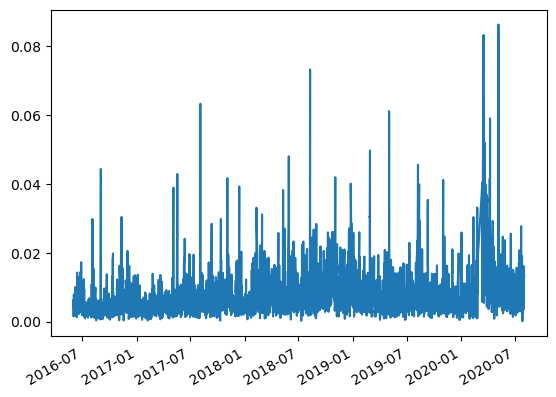

In [55]:
# Visualize the stock volatility
df_merge_shift["stock_volatility"].plot()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [56]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_merge_shift["hourly_stock_return"]=df_merge_shift["close"].pct_change()



In [57]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_merge_shift.head())
display(df_merge_shift.tail())
df_merge_shift.info()

,close,Search Trends,lagged_search_trends,stock_volatility,hourly_stock_return
2016-06-01 09:00:00,135.16,6,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40,33.0,0.006134,-0.002346


,close,Search Trends,lagged_search_trends,stock_volatility,hourly_stock_return
2020-07-31 11:00:00,1105.780,20,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53,47.0,0.013566,0.010678


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7067 entries, 2016-06-01 09:00:00 to 2020-07-31 15:00:00
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   close                 7067 non-null   float64
 1   Search Trends         7067 non-null   int64  
 2   lagged_search_trends  7066 non-null   float64
 3   stock_volatility      7063 non-null   float64
 4   hourly_stock_return   7066 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 589.3 KB


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [58]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_merge_shift[['stock_volatility', 'lagged_search_trends', 'hourly_stock_return']].corr()

,stock_volatility,lagged_search_trends,hourly_stock_return
stock_volatility,1.000000,-0.148938,0.061424
lagged_search_trends,-0.148938,1.000000,0.017929
hourly_stock_return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**
There is not a correlation between the lagged search traffic and the stock volatility nor the hourly stock price.  The Pearson correlation coefficient is very low (-0.15 and 0.18) compared to a perfect correlation of 1 for these combinations.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [59]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends_predict=df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends_predict=df_mercado_trends_predict.rename(columns={"Date":"ds","Search Trends":"y"})
#display(df_mercado_trends_predict.head())
#print("_"*300)
#df_mercado_trends_predict.info()



# Drop an NaN values from the prophet_df DataFrame
#print("_"*300)
df_mercado_trends_predict.dropna()
#df_mercado_trends_predict.info()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(df_mercado_trends_predict.head())
display(df_mercado_trends_predict.tail())


,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [61]:
# Call the Prophet function, store as an object
model=Prophet()
model

In [62]:
# Fit the time-series model.
model.fit(df_mercado_trends_predict)


13:23:19 - cmdstanpy - INFO - Chain [1] start processing
13:23:31 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_trends=model.make_future_dataframe(periods=2000,freq="h")

# View the last five rows of the future_mercado_trends DataFrame
future_trends.tail()

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [65]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast=model.predict(future_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.352625,80.842825,97.904624,44.352625,44.352625,45.307367,45.307367,45.307367,41.452720,...,1.860390,1.860390,1.860390,1.994257,1.994257,1.994257,0.0,0.0,0.0,89.659992
1,2016-06-01 01:00:00,44.353557,78.053114,94.196212,44.353557,44.353557,41.753097,41.753097,41.753097,37.943514,...,1.810288,1.810288,1.810288,1.999294,1.999294,1.999294,0.0,0.0,0.0,86.106654
2,2016-06-01 02:00:00,44.354489,67.351406,84.229922,44.354489,44.354489,31.429548,31.429548,31.429548,27.656552,...,1.768695,1.768695,1.768695,2.004301,2.004301,2.004301,0.0,0.0,0.0,75.784037
3,2016-06-01 03:00:00,44.355421,52.111224,69.135502,44.355421,44.355421,16.162280,16.162280,16.162280,12.417302,...,1.735704,1.735704,1.735704,2.009275,2.009275,2.009275,0.0,0.0,0.0,60.517701
4,2016-06-01 04:00:00,44.356353,35.224156,51.817653,44.356353,44.356353,-0.952639,-0.952639,-0.952639,-4.678127,...,1.711270,1.711270,1.711270,2.014218,2.014218,2.014218,0.0,0.0,0.0,43.403713


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

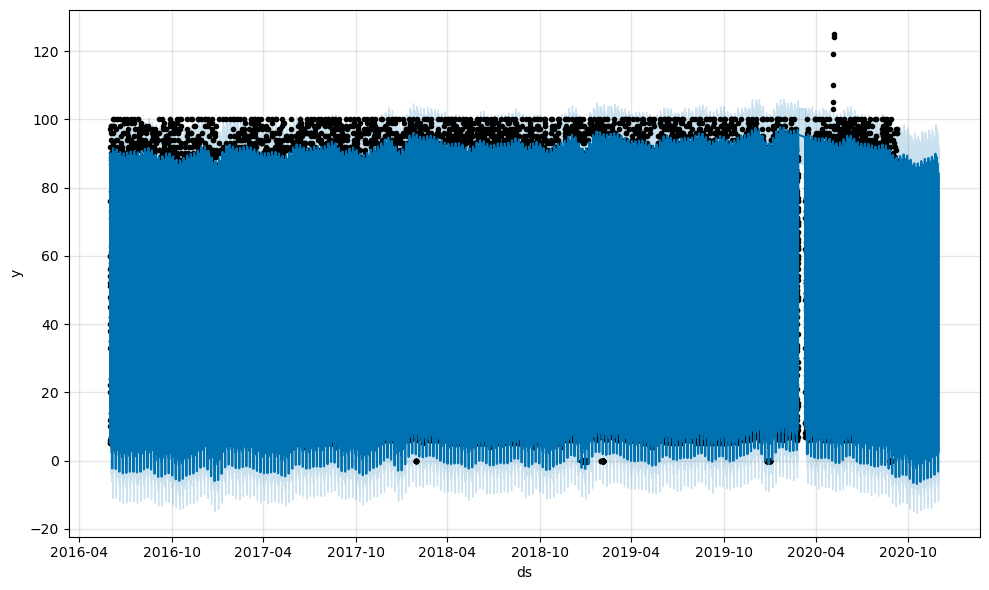

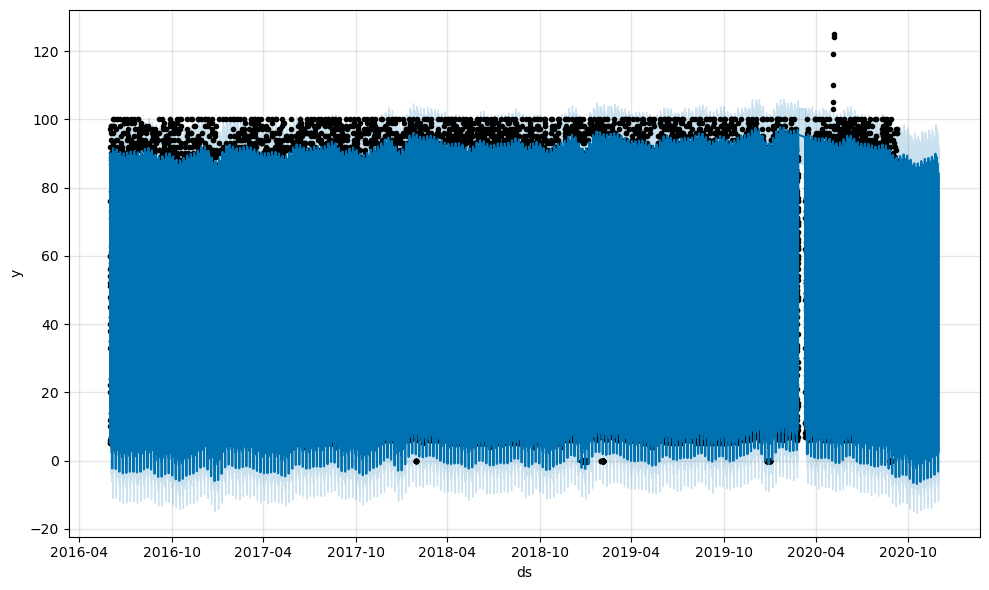

In [66]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**
The popularity of MercadoLibre is forecasted to go down.  This can be seen by the model predicting the traffic to decrease out to October 2020.  This is a continuation of the downward trend seen starting approximately June 2020.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [68]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_components=forecast.set_index("ds")


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_components=forecast_components[["yhat","yhat_lower","yhat_upper"]]
display(forecast_components.head())
forecast_components.info()

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.659992,80.842825,97.904624
2016-06-01 01:00:00,86.106654,78.053114,94.196212
2016-06-01 02:00:00,75.784037,67.351406,84.229922
2016-06-01 03:00:00,60.517701,52.111224,69.135502
2016-06-01 04:00:00,43.403713,35.224156,51.817653


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39106 entries, 2016-06-01 00:00:00 to 2020-11-30 08:00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yhat        39106 non-null  float64
 1   yhat_lower  39106 non-null  float64
 2   yhat_upper  39106 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

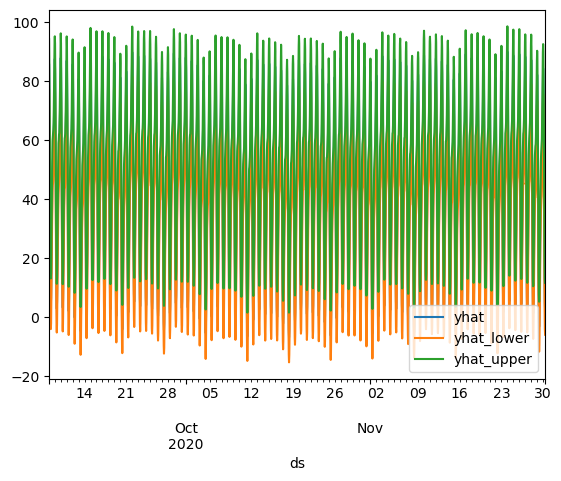

In [69]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast_components[["yhat","yhat_lower","yhat_upper"]].tail(2000).plot()

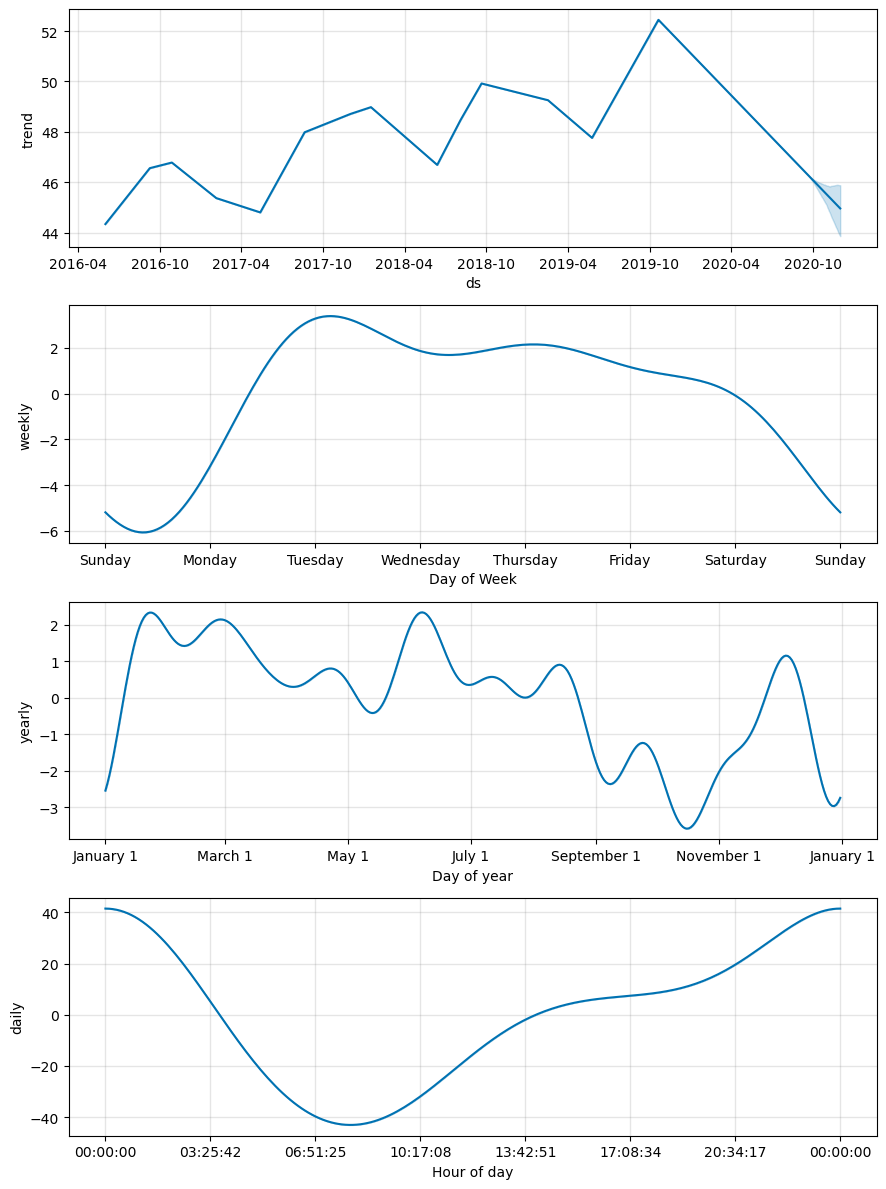

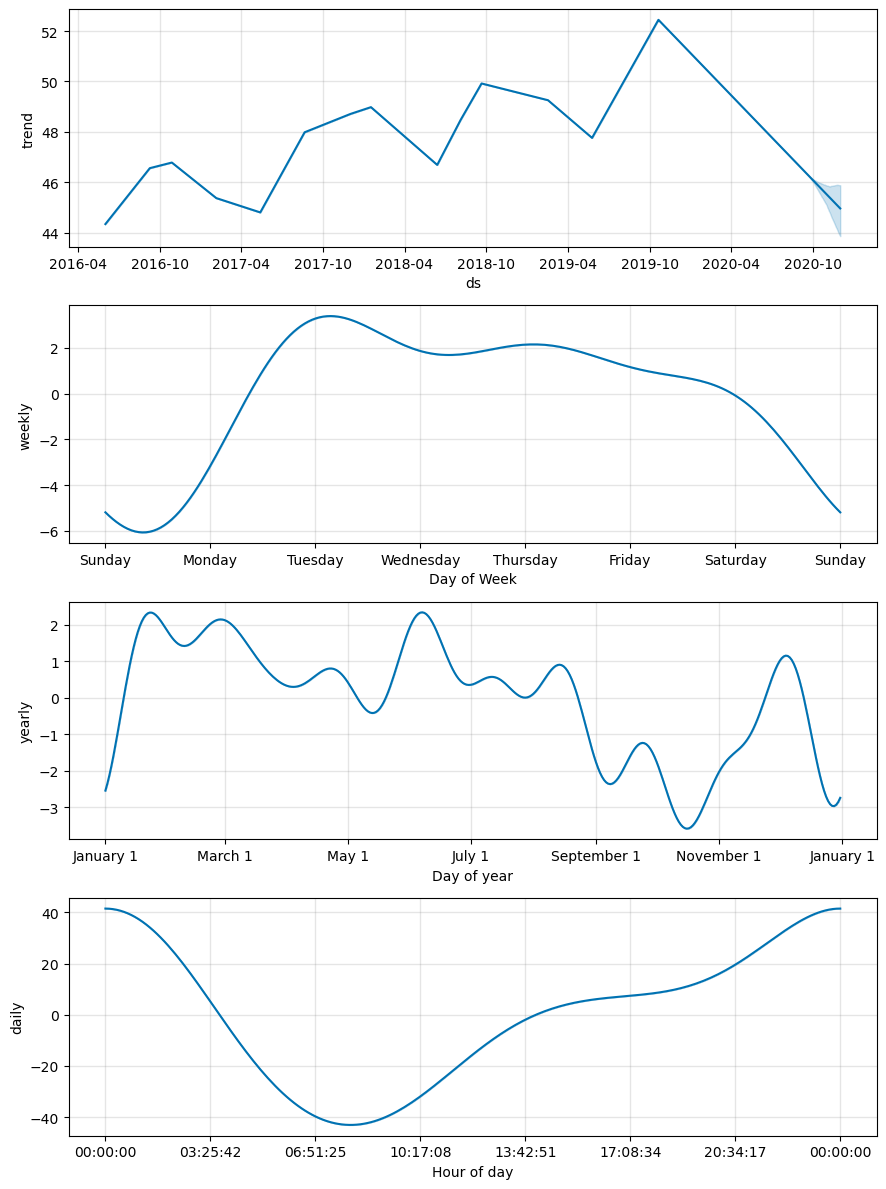

In [70]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_components=forecast_components.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
model.plot_components(forecast)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**
The greatest popularity is seen at midnight (hour 0).

**Question:** Which day of week gets the most search traffic?
   
**Answer:**
Tuesdays get the most search traffic.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**
The lowest point for search traffic during the year is early October.
